# Environmental Configuration

In [1]:
!pip install networkx
!pip install wordcloud
!pip install powerlaw
!pip install networkx

In [2]:
from google.colab import drive
from transformers import pipeline
from tqdm import tqdm
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import pandas as pd
import networkx as nx
import re
import ast
import matplotlib.pyplot as plt
import powerlaw
# plt.style.use('seaborn-v0_8')
plt.style.use('dark_background')

# Auxiliary Methods

In [ ]:
def power_law_distribution(G: nx.DiGraph):
  # If the majority of the scatter is a straight line, we are straight vibin'

  degrees = []
  for node, degree in G.degree:
    degrees.append(degree)
  degrees = Counter(degrees)
  plt.title('Power Law Distribution (Log-Normalized)')
  plt.scatter(
      x = degrees.keys(),
      y = degrees.values()
  )
  plt.xscale('log')
  plt.yscale('log')
  plt.xlabel('Node Degree (LogLog)')
  plt.ylabel('Probability: p(k) = P(X = k)')
  power_fit = powerlaw.Fit([x[1] for x in G.degree])
  print(f"Fitted Power-Law has exponent (alpha) value of: {round(power_fit.alpha, 2)}")

In [ ]:
def general_network_properties(G: nx.DiGraph) -> None:
  print(f"Average Clustering Coefficient is {round(nx.average_clustering(G), 4)}")
  top_k_scored_users = sorted(nx.pagerank(G).items(), key = lambda x:x[1], reverse=True)
  hubs = sorted(nx.hits(G)[0].items(), key = lambda x:x[1], reverse=True)
  authorities = sorted(nx.hits(G)[1].items(), key = lambda x:x[1], reverse=True)

  max_threshold = 10 # @param {type:"number"}
  print(f"Top {max_threshold} Pagerank Users in the Graph")
  for i in range(max_threshold):
    print(f"\tUser {top_k_scored_users[i][0]} has score contribution {round(top_k_scored_users[i][1], 4)}")
  print(f"Top {max_threshold} Hub Users")
  for i in range(max_threshold):
     print(f"\tUser {hubs[i][0]} has score contribution {round(hubs[i][1], 4)}")
  print(f"Top {max_threshold} Authority Users")
  for i in range(max_threshold):
     print(f"\tUser {authorities[i][0]} has score contribution {round(authorities[i][1], 4)}")



  # print(f"Diameter of the Largest Strongly Connected Component is: {nx.diameter(G)}") <Taking way too long, use Gephi instead..>
  # Get average node degree from Gephi; again, taking way too long with networkx :P



# Covid-19 Dataset

In [ ]:
# This is the base-case which evaluates the dataset on all rows
tweets = pd.read_parquet('/content/drive/MyDrive/Graduate/Courses/Winter 2024/EECS 6414/Datasets/UPDATED_covid19_tweets.parquet.gzip')
# tweets = tweets.loc[tweets['validity'] == 'Contains Misinformation']
# tweets = tweets.loc[tweets['validity'] == 'No Misinformation']
tweets.dropna(axis=0)
tweets

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,sentiment,validity,tagged_users
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26,624,950,18775,False,2020-07-25,If I smelled the scent of hand sanitizers toda...,None,Twitter for iPhone,False,negative,No Misinformation,[]
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16,2253,1677,24,True,2020-07-25,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,None,Twitter for Android,False,neutral,No Misinformation,"['@Yankees', '@YankeesPR', '@MLB']"
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28,9275,9525,7254,False,2020-07-25,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,neutral,Contains Misinformation,"['@diane3443', '@wdunlap', '@realDonaldTrump']"
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07,197,987,1488,False,2020-07-25,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,positive,No Misinformation,['@brookbanktv']
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12,101009,168,101,False,2020-07-25,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,neutral,No Misinformation,"['@kansalrohit69', '@DrSyedSehrish', '@airnews..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30,412,1609,1062,False,2020-08-29,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False,positive,No Misinformation,"['@IamOhmai', '@WHO', '@abdlbaasit_', '@hvbxxb..."
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21,150,182,7295,False,2020-08-29,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False,negative,Contains Misinformation,[]
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did ...,2016-07-13,1623,2160,98000,False,2020-08-29,@CTVNews A powerful painting by Juan Lucena. I...,None,Twitter Web App,False,positive,No Misinformation,['@CTVNews']
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27,1338,1111,0,False,2020-08-29,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False,neutral,No Misinformation,[]


In [ ]:
# G = nx.read_gexf("/content/drive/MyDrive/Graduate/Courses/Winter 2024/EECS 6414/Fragments/covid19_tweets_whole_graph.gexf")
G = nx.read_gexf("/content/drive/MyDrive/Graduate/Courses/Winter 2024/EECS 6414/Fragments/covid19_tweets_misinformation_graph.gexf")

TypeError: 'str' object is not callable

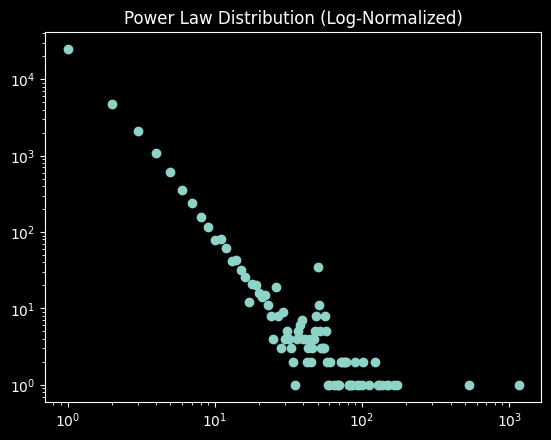

In [ ]:
power_law_distribution(G)

In [ ]:
general_network_properties(G)

Average Clustering Coefficient is 0.0003
Top 10 Pagerank Users in the Graph
	User realDonaldTrump has score contribution 0.0223
	User GOP has score contribution 0.0024
	User YouTube has score contribution 0.0018
	User POTUS has score contribution 0.0017
	User WHO has score contribution 0.0017
	User JoeBiden has score contribution 0.0017
	User BorisJohnson has score contribution 0.0016
	User NYGovCuomo has score contribution 0.0014
	User CDCgov has score contribution 0.0014
	User CNN has score contribution 0.0012
Top 10 Hub Users
	User Michael A. Freeman has score contribution 0.0015
	User Larry W Thomas has score contribution 0.0014
	User karatdawn has score contribution 0.0014
	User 🌊Chicana 63🌊🇲🇽🇺🇸 has score contribution 0.0014
	User Jon Cohen has score contribution 0.0014
	User Teddi Fishman 🧑🏽 👩🏾 👨🏻 📷 📺 (she/her) has score contribution 0.0014
	User Dee B has score contribution 0.0014
	User Steve Carlson 2.020 has score contribution 0.0013
	User Veronica has score contribution 0.001

# Vaccine Dataset

In [ ]:
# This is the base-case which evaluates the dataset on all rows
tweets = pd.read_parquet('/content/drive/MyDrive/Graduate/Courses/Winter 2024/EECS 6414/Datasets/UPDATED_vaccine_tweets.parquet.gzip')
tweets = tweets.loc[tweets['validity'] == 'Contains Misinformation']
# tweets = tweets.loc[tweets['validity'] == 'No Misinformation']
tweets.dropna(axis=0)
tweets

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,sentiment,validity
0,1319174447442448384,1319153697406906369,2020-10-22 12:41:12 India Standard Time,2020-10-22,12:41:12,530,270371054,to_fly_to_live,Flynn Rider,None,...,NaN,NaN,NaN,['@ANI'],NaN,NaN,NaN,NaN,negative,Contains Misinformation
2,1319174114779643905,1319174114779643905,2020-10-22 12:39:52 India Standard Time,2020-10-22,12:39:52,530,116114711,batolebazi,BATOLEBAZI,None,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,neutral,Contains Misinformation
45,1319172595552448518,1319172595552448518,2020-10-22 12:33:50 India Standard Time,2020-10-22,12:33:50,530,29324390,lederhals,Leder Hals,None,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,negative,Contains Misinformation
55,1319172280220446720,1319172280220446720,2020-10-22 12:32:35 India Standard Time,2020-10-22,12:32:35,530,1300850631112974336,pramodkrish536,बेरोजगार Pramod yadav,None,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,negative,Contains Misinformation
64,1319171881224663041,1319171881224663041,2020-10-22 12:31:00 India Standard Time,2020-10-22,12:31:00,530,43224016,drminh,Dr. Minh,None,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,negative,Contains Misinformation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209894,1232796076018671616,1232792334632464385,2020-02-27 04:04:23 India Standard Time,2020-02-27,04:04:23,530,37530795,goshofar,menotu,None,...,NaN,NaN,NaN,"['@TheTNHoller', '@SecAzar']",NaN,NaN,NaN,NaN,negative,Contains Misinformation
209905,1232492571735121922,1232492571735121922,2020-02-26 07:58:22 India Standard Time,2020-02-26,07:58:22,530,626660983,lymanstoneky,Lyman Stone 石來民,None,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,neutral,Contains Misinformation
209906,1232419749050683401,1232414237856817152,2020-02-26 03:09:00 India Standard Time,2020-02-26,03:09:00,530,1197552513140047873,cblevinems,Corri Levine,None,...,NaN,NaN,NaN,"['@IHAVETHEANSWER3', '@NIAIDNews']",NaN,NaN,NaN,NaN,neutral,Contains Misinformation
209916,1231278697702920194,1231278697702920194,2020-02-22 23:34:52 India Standard Time,2020-02-22,23:34:52,530,1219455319,newscientistzon,New Scientist Zone,None,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,neutral,Contains Misinformation


In [ ]:
tweets_graph = nx.read_gexf("/content/drive/MyDrive/Graduate/Courses/Winter 2024/EECS 6414/Fragments/vaccine_tweets_whole_graph.gexf")

# Timeseries Experimentation

In [ ]:
tqdm.pandas()

In [ ]:
# Convert Dates into Month Only for easier Timeseries Analysis
tweets_ts= tweets['date'].progress_apply(lambda x: x[5:7])
tweets['date'] = tweets_ts

100%|██████████| 38320/38320 [00:00<00:00, 291506.19it/s]


{'02': Counter({'negative': 6, 'neutral': 5}), '03': Counter({'negative': 180, 'neutral': 111, 'positive': 13}), '04': Counter({'negative': 1009, 'neutral': 484, 'positive': 32}), '05': Counter({'negative': 1853, 'neutral': 1085, 'positive': 101}), '06': Counter({'negative': 1373, 'neutral': 595, 'positive': 65}), '07': Counter({'negative': 3773, 'neutral': 2252, 'positive': 196}), '08': Counter({'negative': 5291, 'neutral': 2920, 'positive': 149}), '09': Counter({'negative': 6448, 'neutral': 3621, 'positive': 173}), '10': Counter({'negative': 4174, 'neutral': 2319, 'positive': 92})}


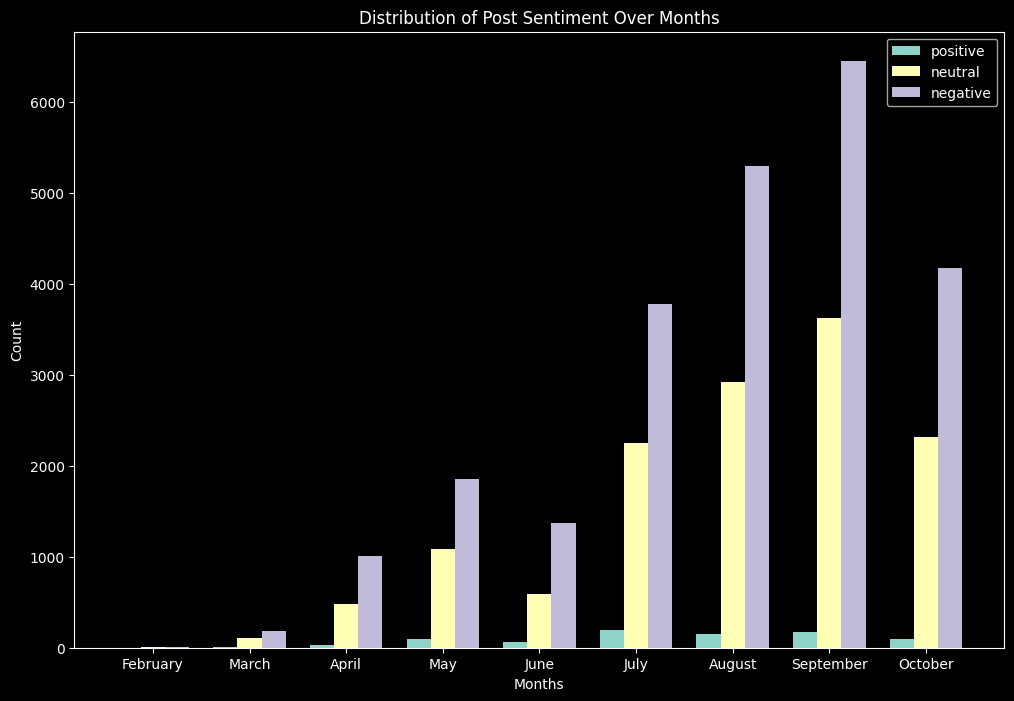

In [ ]:
months = {
    # '01': 'January',
    '02': 'February',
    '03': 'March',
    '04': 'April',
    '05': 'May',
    '06': 'June',
    '07': 'July',
    '08': 'August',
    '09': 'September',
    '10': 'October'
    # '11': 'November',
    # '12': 'December'
}

timeseries = dict.fromkeys(months.keys(), 0)

for month in months.keys():
  ts_month = tweets.loc[tweets['date'] == month]
  timeseries[month] = Counter(ts_month['sentiment'])
print(timeseries)

# Graph Timeseries of Sentiment Over Dataset (Months)

index_months = sorted(timeseries.keys())
categories = ['positive', 'neutral', 'negative']
num_categories = len(categories)
bar_width = 0.25

fig, ax = plt.subplots(figsize=(12, 8))

for i, category in enumerate(categories):
    values = [timeseries[index_month][category] for index_month in index_months]
    positions = range(len(index_months))
    ax.bar([p + i * bar_width for p in positions], values, bar_width, label=category)


ax.set_xlabel('Months')
ax.set_ylabel('Count')
ax.set_title('Distribution of Post Sentiment Over Months')
ax.set_xticks([p + (num_categories - 1) * bar_width / 2 for p in positions])
ax.set_xticklabels(months.values())
ax.legend(loc='best')
plt.show()

{'02': Counter({'Contains Misinformation': 11}), '03': Counter({'Contains Misinformation': 304}), '04': Counter({'Contains Misinformation': 1525}), '05': Counter({'Contains Misinformation': 3039}), '06': Counter({'Contains Misinformation': 2033}), '07': Counter({'Contains Misinformation': 6221}), '08': Counter({'Contains Misinformation': 8360}), '09': Counter({'Contains Misinformation': 10242}), '10': Counter({'Contains Misinformation': 6585})}


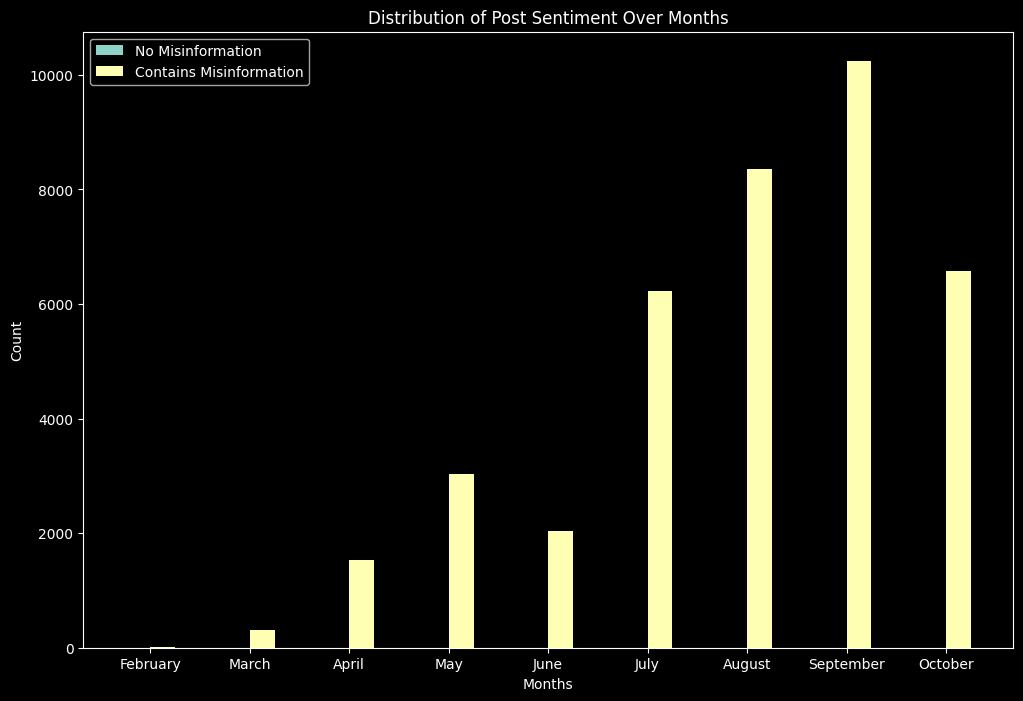

In [ ]:
months = {
    # '01': 'January',
    '02': 'February',
    '03': 'March',
    '04': 'April',
    '05': 'May',
    '06': 'June',
    '07': 'July',
    '08': 'August',
    '09': 'September',
    '10': 'October'
    # '11': 'November',
    # '12': 'December'
}

timeseries = dict.fromkeys(months.keys(), 0)

for month in months.keys():
  ts_month = tweets.loc[tweets['date'] == month]
  timeseries[month] = Counter(ts_month['validity'])

# Graph Valid vs Invalid Information of Dataset (Over Months)

print(timeseries)

index_months = sorted(timeseries.keys())
categories = ['No Misinformation', 'Contains Misinformation']
num_categories = len(categories)
bar_width = 0.25

fig, ax = plt.subplots(figsize=(12, 8))

for i, category in enumerate(categories):
    values = [timeseries[index_month][category] for index_month in index_months]
    positions = range(len(index_months))
    ax.bar([p + i * bar_width for p in positions], values, bar_width, label=category)


ax.set_xlabel('Months')
ax.set_ylabel('Count')
ax.set_title('Distribution of Post Sentiment Over Months')
ax.set_xticks([p + (num_categories - 1) * bar_width / 2 for p in positions])
ax.set_xticklabels(months.values())
ax.legend(loc='best')
plt.show()


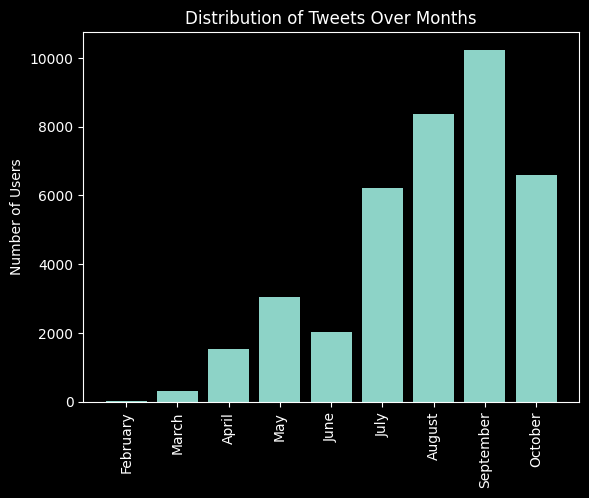

In [ ]:
timeseries = dict.fromkeys(months.keys(), 0)

for month in months.keys():
  ts_month = tweets.loc[tweets['date'] == month]
  timeseries[month] = len(ts_month)

plt.title('Distribution of Tweets Over Months')
plt.xlabel=("Location")
plt.ylabel("Number of Users")
plt.bar(months.values(),
        timeseries.values(),
        label='Tweets',
        )
plt.xticks(rotation='vertical')
plt.autoscale()
plt.show()

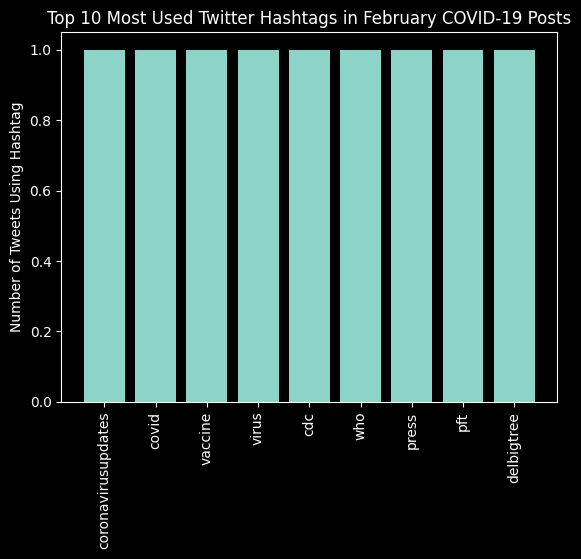

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


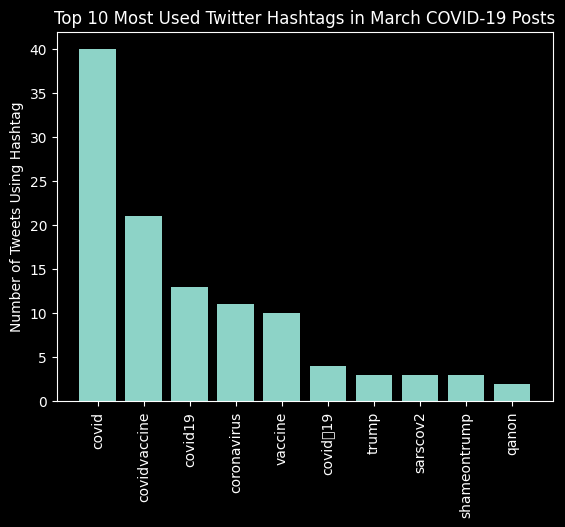

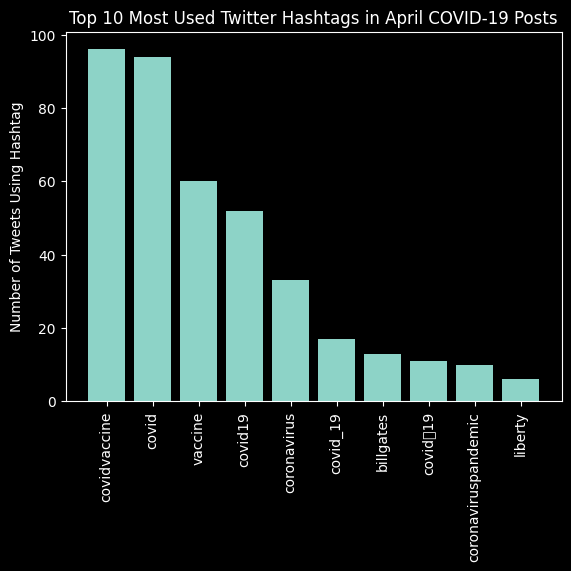

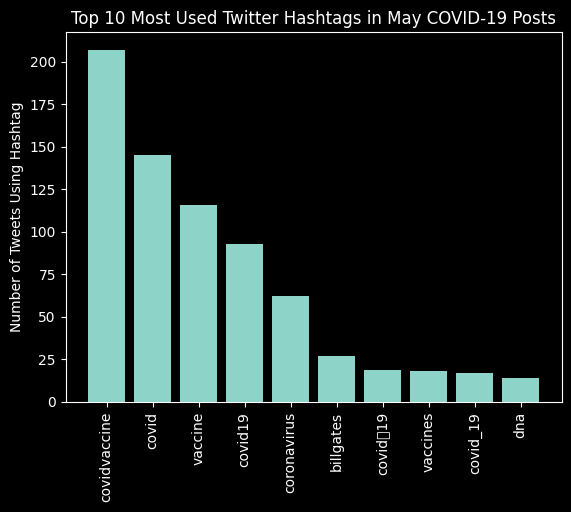

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12493 (\N{KATAKANA LETTER NE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12483 (\N{KATAKANA LETTER SMALL TU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

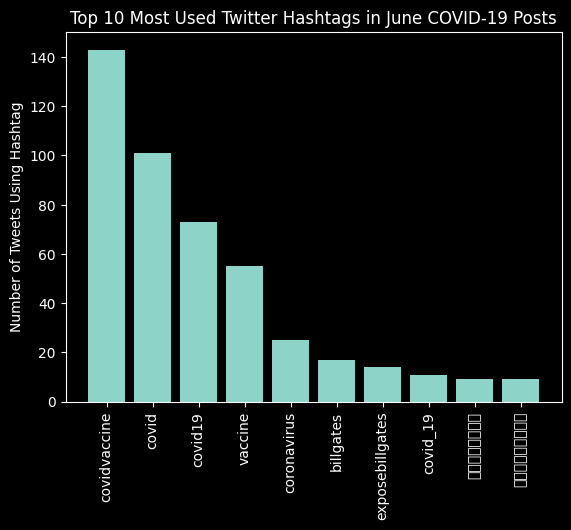

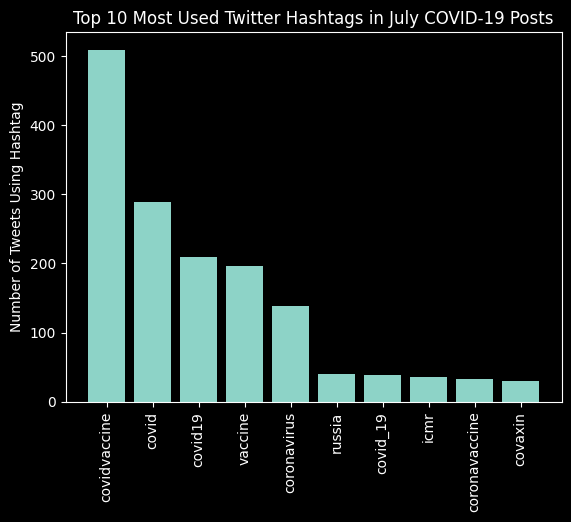

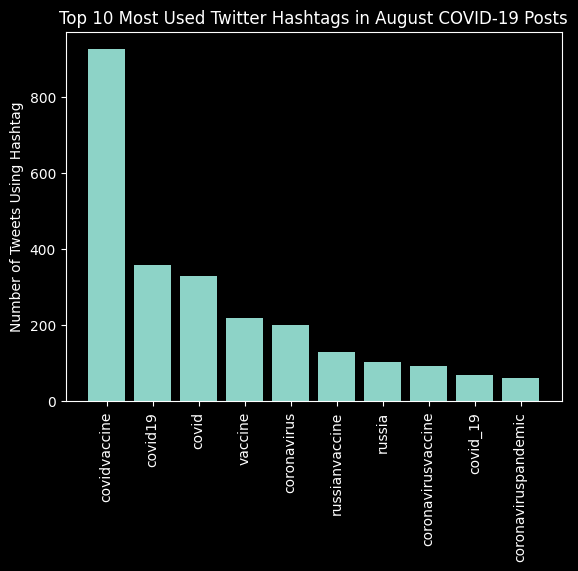

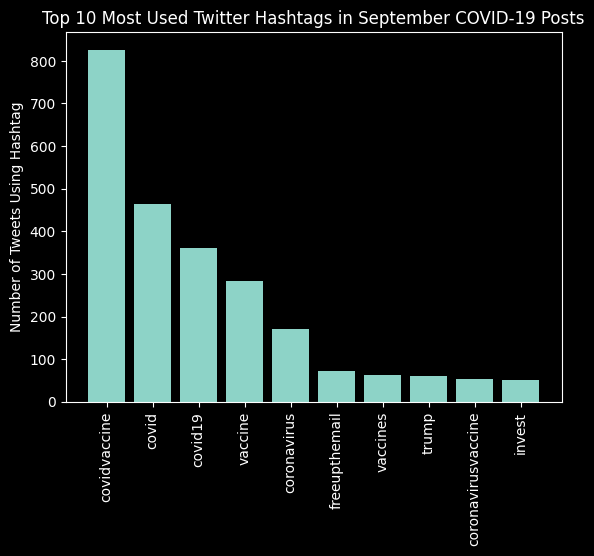

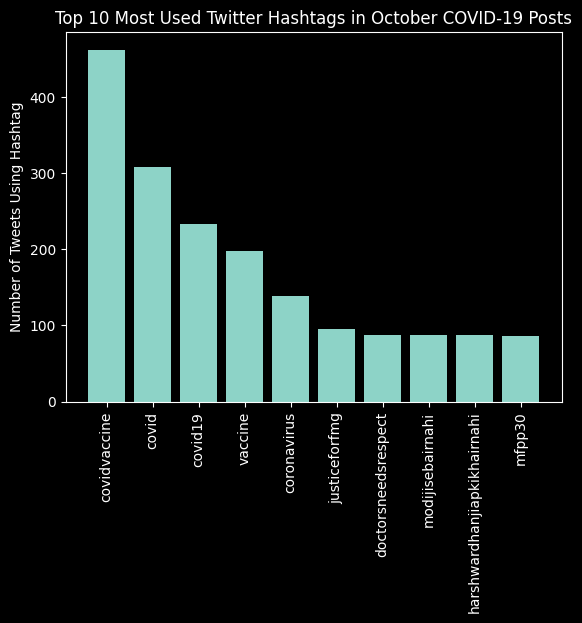

In [ ]:
timeseries = dict.fromkeys(months.keys(), 0)
for month in months.keys():
  ts_month = tweets.loc[tweets['date'] == month]
  hashtags = []
  for entry in ts_month['hashtags']:
    if str(entry).strip() != 'None':
      hashtags += ast.literal_eval(entry.lower())
    else:
      hashtags.append('none')
  hashtag_count = Counter(hashtags)
  hashtags = hashtag_count.most_common(10)
  plot_hashtags = {}
  for entry in hashtags:
    plot_hashtags[entry[0]] = entry[1]

  plt.title('Top 10 Most Used Twitter Hashtags in {} COVID-19 Posts'.format(months[month]))
  plt.xlabel=("Hashtags")
  plt.ylabel("Number of Tweets Using Hashtag")
  plt.bar(plot_hashtags.keys(),
          plot_hashtags.values(),
          label='Twitter Contribution',
          )
  plt.xticks(rotation='vertical')
  plt.autoscale()
  plt.show()




In [ ]:
G = nx.read_gexf("/content/drive/MyDrive/Graduate/Courses/Winter 2024/EECS 6414/Fragments/vaccine_tweets_misinformation_graph.gexf")
general_network_properties(G)

Average Clustering Coefficient is 0.0044
Top 10 Pagerank Users in the Graph
	User realDonaldTrump has score contribution 0.0115
	User YouTube has score contribution 0.0086
	User johnosullpsi has score contribution 0.0025
	User MailOnline has score contribution 0.002
	User wakingtimes has score contribution 0.0016
	User JoeBiden has score contribution 0.0012
	User frontlinepbs has score contribution 0.0012
	User BillGates has score contribution 0.0012
	User khnews has score contribution 0.0011
	User CNN has score contribution 0.001
Top 10 Hub Users
	User jpatte8007 has score contribution 0.0013
	User cheese24k has score contribution 0.0011
	User arumughamvinu has score contribution 0.001
	User mpsac has score contribution 0.001
	User post1113a has score contribution 0.001
	User jbarkerjune has score contribution 0.001
	User jcho710 has score contribution 0.001
	User anne4189 has score contribution 0.001
	User discangirl has score contribution 0.0009
	User ashok5422000 has score contribu

In [ ]:
G_undirected = nx.DiGraph.to_undirected(G)
largest_scc = max(nx.strongly_connected_components(G), key=len)
print(f'The largest strongly connected component from the graph is: {largest_scc}')

The largest strongly connected component from the graph is: {'afewpoints', 'brianbloop2', 'resiguru', 'mindedmusically'}


Calculating best minimal value for power law fit
Fitted Power-Law has exponent (alpha) value of: 2.82


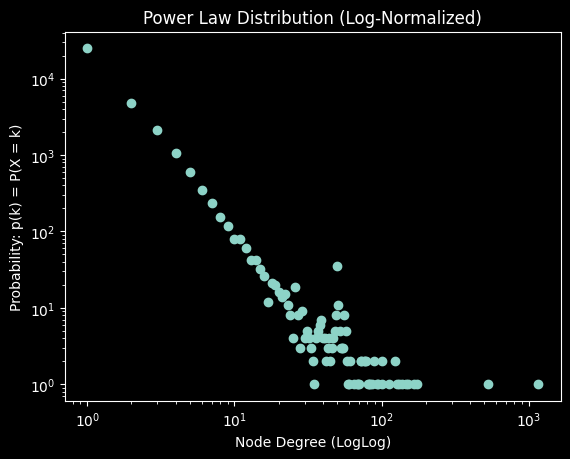

In [ ]:
power_law_distribution(G)

# Graph Partitioning

In [ ]:
communities = nx.community.louvain_communities(G)

## Null Model (Barabasi-Albert)

In [ ]:
num_of_nodes = 35147
null_model = nx.barabasi_albert_graph(num_of_nodes, 1)
print(nx.number_of_edges(null_model))
nx.write_gexf(null_model, 'null_model.gexf')

35146


Calculating best minimal value for power law fit
Fitted Power-Law has exponent (alpha) value of: 2.99


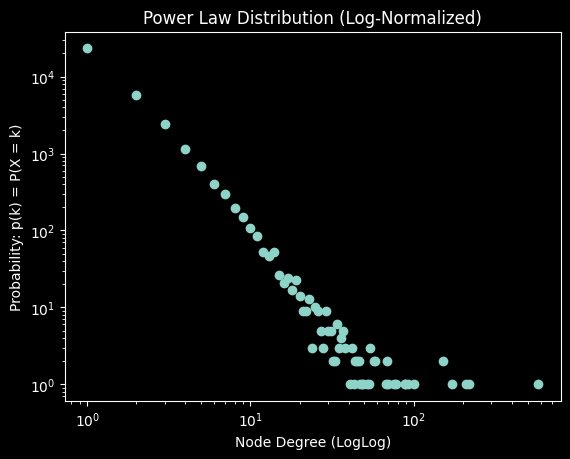

In [ ]:
power_law_distribution(null_model)